In [2]:
#from sympy import *
#from sympy.physics.mechanics import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

# Energy Control

Eigenvalues: -1.21, -5.79


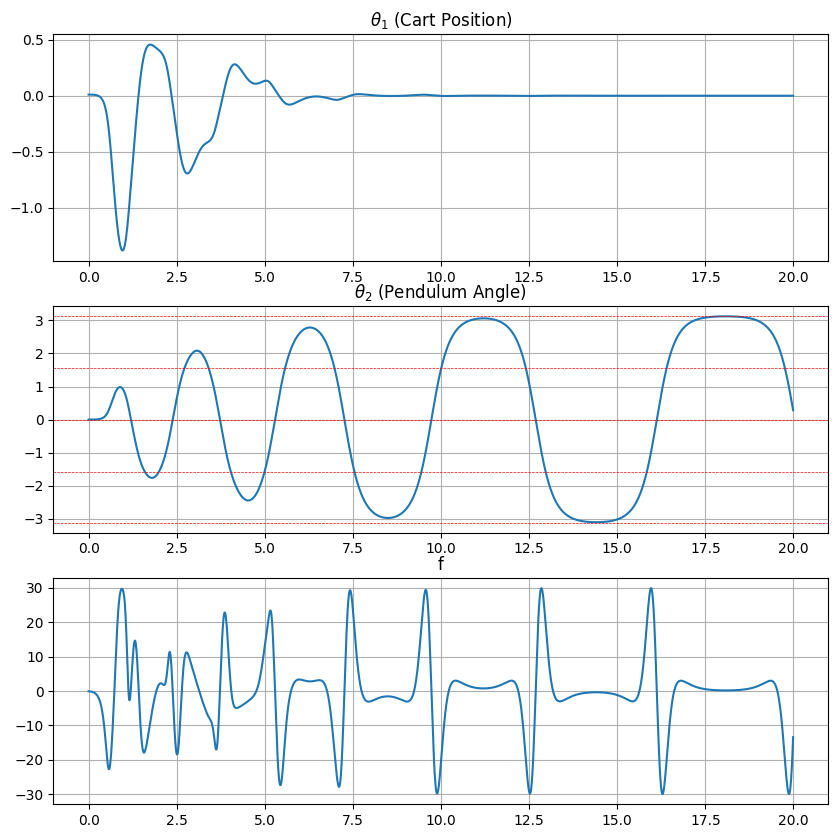

In [39]:
def sat(x, limit):
    if x > limit:
        return limit
    elif x < -limit:
        return -limit
    else:
        return x

m1 = 1
m2 = 1
l2 = 1
g = 9.81

K1 = 7
K2 = 7
K3 = 1
eigenvalues = np.linalg.eigvals(np.array([[0, 1], [-K1, -K2]]))
print(f'Eigenvalues: {eigenvalues[0]:.2f}, {eigenvalues[1]:.2f}')

dt = 0.01
tf = 20
t = np.arange(0, tf, dt)

theta1_0 = 0.01
theta1_dot_0 = 0

theta2_0 = 0
theta2_dot_0 = 0

Ec = m2*g*l2

def ode(t, y):
    theta1, theta1_dot, theta2, theta2_dot = y
    E = 1/2*m2*(l2*theta2_dot)**2 - m2*g*l2*np.cos(theta2)
    u = -K1*theta1 - K2*theta1_dot - K3*(Ec-E)*np.cos(theta2)*theta2_dot
    f = (m1+m2)*u - m2*np.cos(theta2)*(np.cos(theta2)*u+g*np.sin(theta2)) - m2*l2*theta2_dot**2*np.sin(theta2)
    theta2_ddot = -1/l2*(np.cos(theta2)*u + g*np.sin(theta2))
    theta1_ddot = (f - m2*l2*np.cos(theta2)*theta2_ddot + m2*l2*theta2_dot**2*np.sin(theta2))/(m1+m2)
    return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]

sol = solve_ivp(ode, [0, tf], [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0], t_eval=t)
theta1, theta1_dot, theta2, theta2_dot = sol.y

f = (m1+m2)*(-K1*theta1 - K2*theta1_dot - K3*(Ec-(1/2*m2*(l2*theta2_dot)**2 - m2*g*l2*np.cos(theta2)))*np.cos(theta2)*theta2_dot) - m2*np.cos(theta2)*(np.cos(theta2)*(-K1*theta1 - K2*theta1_dot - K3*(Ec-(1/2*m2*(l2*theta2_dot)**2 - m2*g*l2*np.cos(theta2)))*np.cos(theta2)*theta2_dot)+g*np.sin(theta2)) - m2*l2*theta2_dot**2*np.sin(theta2)

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.plot(t, theta1)
plt.title(r'$\theta_1$ (Cart Position)')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, theta2)
plt.title(r'$\theta_2$ (Pendulum Angle)')
plt.axhline(y=np.pi, color='r', linestyle='--', lw=0.5)
plt.axhline(y=np.pi/2, color='r', linestyle='--', lw=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=0.5)
plt.axhline(y=-np.pi/2, color='r', linestyle='--', lw=0.5)
plt.axhline(y=-np.pi, color='r', linestyle='--', lw=0.5)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, f)
plt.title('f')
plt.grid()
plt.show()

In [47]:
p1 = lambda th: (th[0], 0)
p2 = lambda th: (th[0]+l2*np.sin(th[1]), -l2*np.cos(th[1]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

(x1_0, y1_0) = p1((theta1[0], theta2[0]))
(x2_0, y2_0) = p2((theta1[0], theta2[0]))
line = ax.plot([x1_0, x2_0], [y1_0, y2_0], 'o-', lw=2)[0]

text = ax.text(0.05, 0.9, f'time: {t[0]:.1f} s\nf: {f[0]:.1f} N', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

fps = 30
def animate(i):
    i = int(i/(fps*dt))
    (x1, y1) = p1((theta1[i], theta2[i]))
    (x2, y2) = p2((theta1[i], theta2[i]))
    line.set_data([x1, x2], [y1, y2])
    text.set_text(f'time: {t[i]:.1f} s\nf: {f[i]:.1f} N\nE: {1/2*m2*(l2*theta2_dot[i])**2 - m2*g*l2*np.cos(theta2[i]):.1f}')

ani = animation.FuncAnimation(fig, animate, frames=fps*tf)
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'cart_energy_control.mp4', writer=ffmpeg_writer)
plt.close(fig)

# Position Control

Eigenvalues: 0.00, 0.00


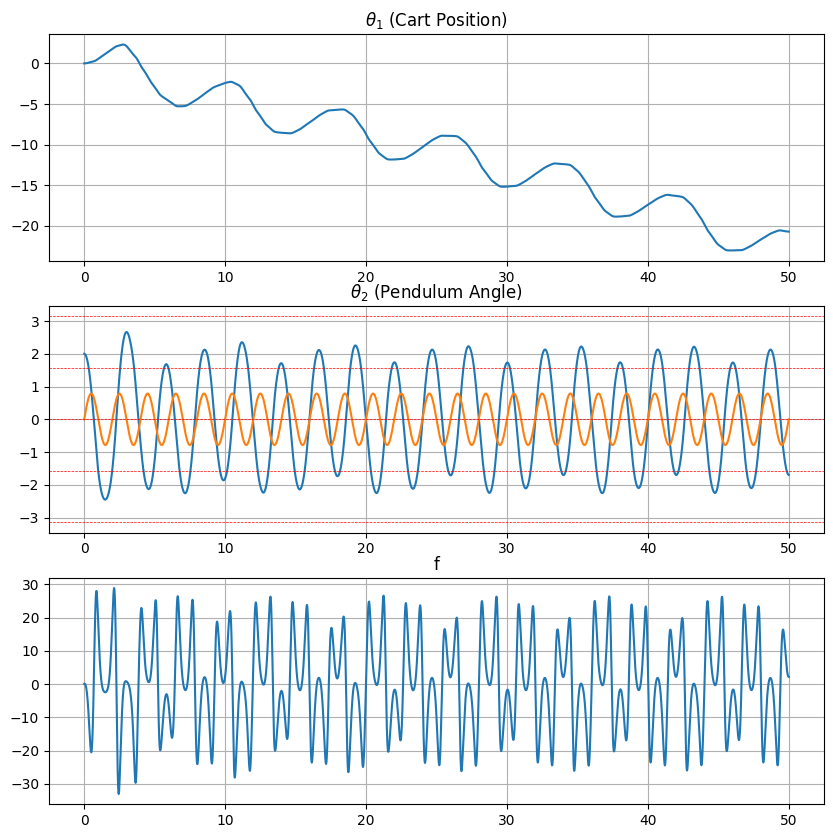

In [66]:
def sat(x, limit):
    if x > limit:
        return limit
    elif x < -limit:
        return -limit
    else:
        return x

m1 = 1
m2 = 1
l2 = 1
g = 9.81

K1 = 0
K2 = 0
K3 = 1
K4 = 0
eigenvalues = np.linalg.eigvals(np.array([[0, 1], [-K1, -K2]]))
print(f'Eigenvalues: {eigenvalues[0]:.2f}, {eigenvalues[1]:.2f}')

dt = 0.001
tf = 50
t = np.arange(0, tf, dt)

theta_d = lambda t: np.pi/4*np.sin(np.pi*t)#+np.pi/8
theta_d_dot = lambda t: np.pi**2/4*np.cos(np.pi*t)

theta1_0 = 0
theta1_dot_0 = 0

theta2_0 = 2
theta2_dot_0 = 0

def ode(t, y):
    theta1, theta1_dot, theta2, theta2_dot = y
    u = -K1*theta1 - K2*theta1_dot - K3*(theta2-theta_d(t))*np.cos(theta2)*(theta2_dot-theta_d_dot(t))
    f = (m1+m2)*u - m2*np.cos(theta2)*(np.cos(theta2)*u+g*np.sin(theta2)) - m2*l2*theta2_dot**2*np.sin(theta2)
    theta2_ddot = -1/l2*(np.cos(theta2)*u + g*np.sin(theta2))
    theta1_ddot = (f - m2*l2*np.cos(theta2)*theta2_ddot + m2*l2*theta2_dot**2*np.sin(theta2))/(m1+m2)
    return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]

sol = solve_ivp(ode, [0, tf], [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0], t_eval=t)
theta1, theta1_dot, theta2, theta2_dot = sol.y

u = -K1*theta1 - K2*theta1_dot - K3*(theta2-theta_d(t)) - K4*(theta2_dot-theta_d_dot(t))
f = (m1+m2)*u - m2*np.cos(theta2)*(np.cos(theta2)*u+g*np.sin(theta2)) - m2*l2*theta2_dot**2*np.sin(theta2)
#f = (m1+m2)*(-K1*theta1 - K2*theta1_dot - K3*(Ec-(1/2*m2*(l2*theta2_dot)**2 - m2*g*l2*np.cos(theta2)))*np.cos(theta2)*theta2_dot) - m2*np.cos(theta2)*(np.cos(theta2)*(-K1*theta1 - K2*theta1_dot - K3*(Ec-(1/2*m2*(l2*theta2_dot)**2 - m2*g*l2*np.cos(theta2)))*np.cos(theta2)*theta2_dot)+g*np.sin(theta2)) - m2*l2*theta2_dot**2*np.sin(theta2)

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.plot(t, theta1)
plt.title(r'$\theta_1$ (Cart Position)')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, theta2)
plt.plot(t, theta_d(t))
plt.title(r'$\theta_2$ (Pendulum Angle)')
plt.axhline(y=np.pi, color='r', linestyle='--', lw=0.5)
plt.axhline(y=np.pi/2, color='r', linestyle='--', lw=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=0.5)
plt.axhline(y=-np.pi/2, color='r', linestyle='--', lw=0.5)
plt.axhline(y=-np.pi, color='r', linestyle='--', lw=0.5)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, f)
plt.title('f')
plt.grid()
plt.show()

In [48]:
p1 = lambda th: (th[0], 0)
p2 = lambda th: (th[0]+l2*np.sin(th[1]), -l2*np.cos(th[1]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

# Plot initial position
line = ax.plot([theta1[0], theta1[0]+l2*np.sin(theta2[0])], [0, -l2*np.cos(theta2[0])], 'o-', lw=2)[0]
line_d = ax.plot([theta1[0], theta1[0]+l2*np.sin(theta_d(0))], [0, -l2*np.cos(theta_d(0))], 'r--', lw=2)[0]

# Text box for time and force
text = ax.text(0.05, 0.9, f'time: {t[0]:.1f} s\nf: {f[0]:.1f} N', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

fps = 30
def animate(i):
    i = int(i/(fps*dt))
    line.set_data([theta1[i], theta1[i]+l2*np.sin(theta2[i])], [0, -l2*np.cos(theta2[i])])
    line_d.set_data([theta1[i], theta1[i]+l2*np.sin(theta_d(i*dt))], [0, -l2*np.cos(theta_d(i*dt))])
    text.set_text(f'time: {t[i]:.1f} s\nf: {f[i]:.1f} N\nE: {1/2*m2*(l2*theta2_dot[i])**2 - m2*g*l2*np.cos(theta2[i]):.1f}')

ani = animation.FuncAnimation(fig, animate, frames=fps*10)
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'cart_position_control.mp4', writer=ffmpeg_writer)
plt.close(fig)